In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import bullet, dataset, distance, error, output, report, speed, split
np.seterr('raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
data = dataset.load_trajectory(898, 1393786760018)
head, tail = split.split_trajectory_with_overlap(data, 0.75)

In [3]:
speed.calculate_speed_in_ms(head[-2], head[-1])

3.0618336105497335

In [4]:
head_x, head_y = head[:, 0], head[:, 1]
tail_x, tail_y = tail[:, 0], tail[:, 1]

prediction = bullet.bullet_prediction(head, 60)
pred_x, pred_y = prediction[:, 0], prediction[:, 1]

print(distance.calculate_trajectory_length_in_meters(tail))
print(distance.calculate_trajectory_length_in_meters(prediction))

1228.617344478807
162.51945247631156


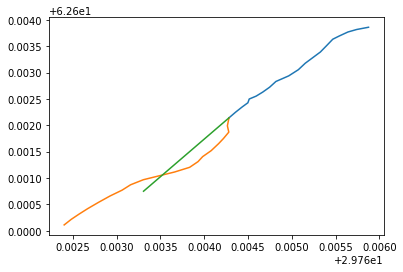

1228.617344478807
162.51945247631156


In [5]:
plt.plot(head_y[-20:], head_x[-20:])
plt.plot(tail_y[:20], tail_x[:20])
plt.plot(pred_y, pred_x)
plt.show()

print(distance.calculate_trajectory_length_in_meters(tail))
print(distance.calculate_trajectory_length_in_meters(prediction))

output.output_coordinates_to_file("../head.txt", head)
output.output_coordinates_to_file("../tail.txt", tail)
output.output_coordinates_to_file("../pred.txt", prediction)

In [6]:
report.generate_report_for_user(user_id=898, method='bullet', ratio=0.5, time=60, verbosity=1)


ERROR STATISTICS 
average			 676.7346883568762 
median			 426.4256514681637 
standard deviation	 966.66203804719 
failed predictions	 21


{'user_id': 898,
 'method': 'bullet',
 'ratio': 0.5,
 'threshold': 10,
 'time': 60,
 'failed predictions': 21,
 'error average': 676.7346883568762,
 'error median': 426.4256514681637,
 'error standard deviation': 966.66203804719}